In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.datasets import make_circles
from sklearn.preprocessing import OneHotEncoder

from keras.utils import np_utils
from keras.layers import Dense, Activation
from keras.models import Sequential

In [2]:
X, y = make_circles(n_samples = 1000, factor = 0.3, noise =0.1)
print X.shape, y.shape

(1000, 2) (1000,)


In [3]:
Y = np_utils.to_categorical(y)
print Y.shape
print Y

(1000, 2)
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]]


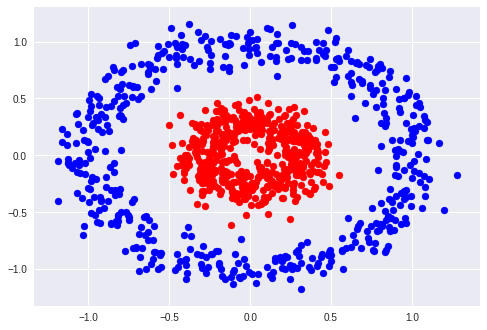

In [4]:
for ix in range(X.shape[0]):
    if y[ix] == 0:
        sns.plt.scatter(X[ix, 0], X[ix, 1], color = 'blue')
    else:
        sns.plt.scatter(X[ix, 0], X[ix, 1], color = 'red')
plt.show()

In [5]:
model = Sequential()

model.add(Dense(5, input_shape=(2,)))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adagrad', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [6]:
split = int(0.8 * X.shape[0])

X_train = X[:split]
y_train = Y[:split]

X_test = X[split:]
y_test = Y[split:]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(800, 2) (800, 2)
(200, 2) (200, 2)


In [7]:
hist = model.fit(X_train, y_train,
                epochs = 100,
                shuffle = True,
                batch_size = 100,
                validation_data = (X_test, y_test), verbose = 2)

Train on 800 samples, validate on 200 samples
Epoch 1/100
0s - loss: 0.6066 - acc: 0.5425 - val_loss: 0.6155 - val_acc: 0.5900
Epoch 2/100
0s - loss: 0.5912 - acc: 0.6175 - val_loss: 0.6039 - val_acc: 0.6400
Epoch 3/100
0s - loss: 0.5811 - acc: 0.6550 - val_loss: 0.5951 - val_acc: 0.6700
Epoch 4/100
0s - loss: 0.5731 - acc: 0.6987 - val_loss: 0.5879 - val_acc: 0.7200
Epoch 5/100
0s - loss: 0.5663 - acc: 0.7300 - val_loss: 0.5817 - val_acc: 0.7350
Epoch 6/100
0s - loss: 0.5603 - acc: 0.7550 - val_loss: 0.5761 - val_acc: 0.7700
Epoch 7/100
0s - loss: 0.5549 - acc: 0.7762 - val_loss: 0.5711 - val_acc: 0.7850
Epoch 8/100
0s - loss: 0.5499 - acc: 0.7963 - val_loss: 0.5664 - val_acc: 0.8100
Epoch 9/100
0s - loss: 0.5452 - acc: 0.8162 - val_loss: 0.5619 - val_acc: 0.8200
Epoch 10/100
0s - loss: 0.5407 - acc: 0.8300 - val_loss: 0.5577 - val_acc: 0.8250
Epoch 11/100
0s - loss: 0.5365 - acc: 0.8425 - val_loss: 0.5537 - val_acc: 0.8450
Epoch 12/100
0s - loss: 0.5325 - acc: 0.8500 - val_loss: 0.54

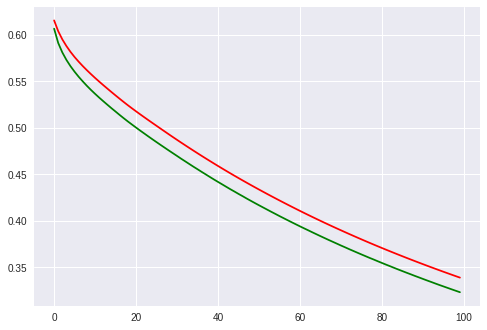

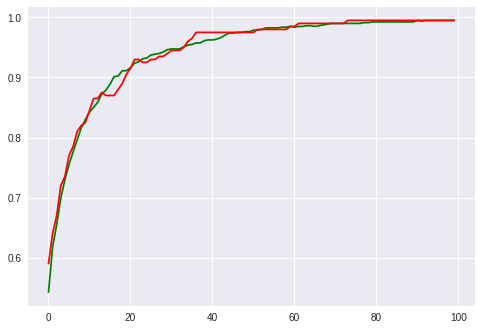

In [8]:
data = hist.history

plt.figure(0)
plt.plot(data['loss'], 'g')
plt.plot(data['val_loss'], 'r')

plt.figure(1)
plt.plot(data['acc'], 'g')
plt.plot(data['val_acc'], 'r')

plt.show()